In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('suv_data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
data.shape

(400, 5)

Text(0, 0.5, 'Age')

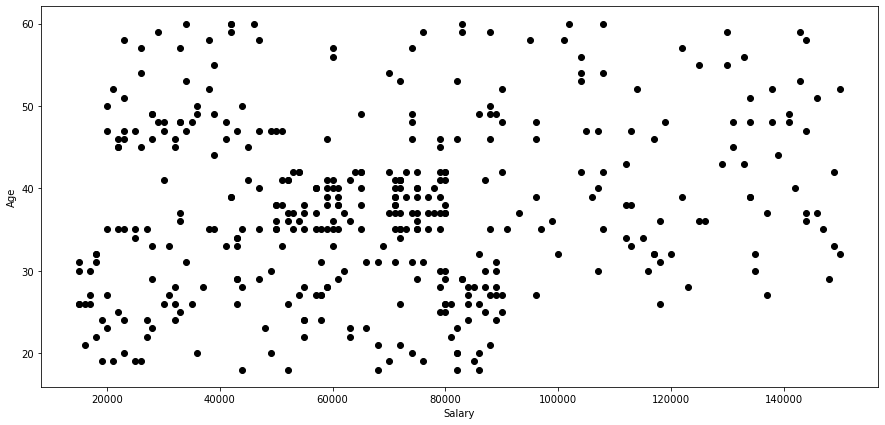

In [5]:
plt.figure(figsize=(15,7))
plt.scatter(data['EstimatedSalary'],data['Age'],color='black')
plt.xlabel('Salary')
plt.ylabel('Age')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

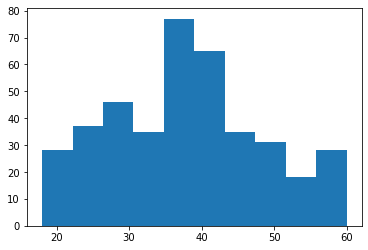

In [7]:
plt.hist(data['Age'])

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

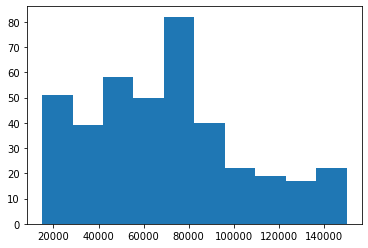

In [8]:
plt.hist(data['EstimatedSalary'])

In [9]:
y = data['Purchased']
y_array = np.array(y)
y_reshaped = np.reshape(y_array,(-1,1))

In [10]:
X = data.drop(['Purchased'],axis=1)
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
X = ss.fit_transform(X)
X

array([[-0.93657932,  1.02020406, -1.78179743, -1.49004624],
       [ 1.66838653,  1.02020406, -0.25358736, -1.46068138],
       [-0.32087714, -0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.52039175, -0.98019606,  1.17910958, -1.46068138],
       [ 0.88695546,  1.02020406, -0.15807423, -1.07893824],
       [-1.36231017, -0.98019606,  1.08359645, -0.99084367]])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_reshaped,test_size=0.3,random_state=1)

In [14]:
regressor=LogisticRegression()

In [15]:
model=regressor.fit(X_train,y_train)

C:\Users\tejas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
pred = model.predict(X_test)

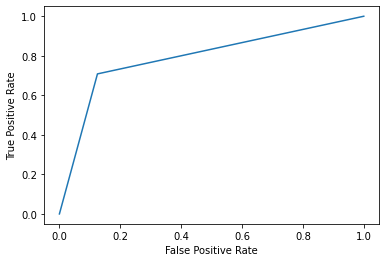

In [24]:
# ROC Curve
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
# Calculating auc 
auc = metrics.roc_auc_score(y_test,pred)
auc

0.7916666666666667

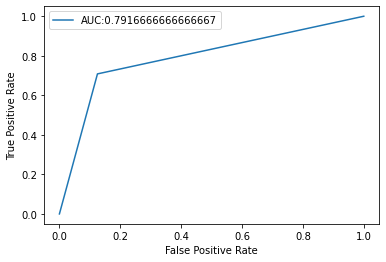

In [31]:
plt.plot(fpr,tpr,label='AUC:'+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,pred)
print(cm)

[[63  9]
 [14 34]]


In [67]:
acc = accuracy_score(y_test,pred)
acc

0.8083333333333333

<AxesSubplot:>

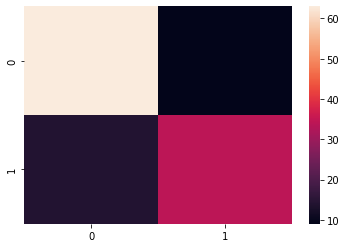

In [73]:
sns.heatmap(cm)